# Challenge Set 6 - Linear Regression and Learning Curve 

In [231]:
import pandas as pd
import html5lib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression

%matplotlib inline

from sklearn.metrics import r2_score

import statsmodels.api as sm

C:\Users\aj282\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
X = np.linspace(1,100, 10000)
# num_obs = 10000
# X = []
# for i in range(num_obs):
#     X.append((np.random.uniform(1,100)))
# # logdata = np.random.randn(1,100)
# # df = pd.DataFrame(logdata)

In [3]:
df = pd.DataFrame(X)

In [4]:
df.rename(index=str, columns={0: 'X'}, inplace=True)

In [5]:
# B0 = np.linspace(.9,1.1, 10000)

In [6]:
# B1 = []
# for i in range(10000):
#     B1.append((np.random.random()*25/np.random.random()))

In [7]:
epsilon = []
for i in range(10000):
    epsilon.append((np.random.random()/10))

In [8]:
df['B0'] = 1

In [9]:
df['epsilon'] = epsilon

In [10]:
df['B1'] = 3

In [11]:
df.head()

,X,B0,epsilon,B1
0,1.000000,1,0.097660,3
1,1.009901,1,0.070591,3
2,1.019802,1,0.083583,3
3,1.029703,1,0.028201,3
4,1.039604,1,0.035029,3


In [102]:
def transform_y(B0, B1, X, epsilon):
    return B0 + (B1*np.log(X)) + epsilon


df['y'] = df.apply(lambda x: transform_y(x['B0'], x['B1'], x['X'], x['epsilon']), axis=1)

In [103]:
df.head()

,X,B0,epsilon,B1,y,X2
0,1.000000,1,0.090747,3,1.090747,1.000000
1,1.008016,1,0.018520,3,1.042472,1.016096
2,1.016032,1,0.035504,3,1.083219,1.032321
3,1.024048,1,0.053856,3,1.125146,1.048675
4,1.032064,1,0.098263,3,1.192945,1.065156


In [104]:
def transform_ysq(B0, B1, X, epsilon):
    return B0 + (B1*(X**2)) + epsilon


df['ysq'] = df.apply(lambda x: transform_ysq(x['B0'], x['B1'], x['X'], x['epsilon']), axis=1)

In [115]:
df['logX'] = np.log(df['X'])

In [105]:
df['X2'] = np.square(df['X'])

In [116]:
df.head()

,X,B0,epsilon,B1,y,X2,ysq,logX
0,1.000000,1,0.090747,3,1.090747,1.000000,4.090747,0.000000
1,1.008016,1,0.018520,3,1.042472,1.016096,4.066809,0.007984
2,1.016032,1,0.035504,3,1.083219,1.032321,4.132468,0.015905
3,1.024048,1,0.053856,3,1.125146,1.048675,4.199879,0.023763
4,1.032064,1,0.098263,3,1.192945,1.065156,4.293732,0.031561


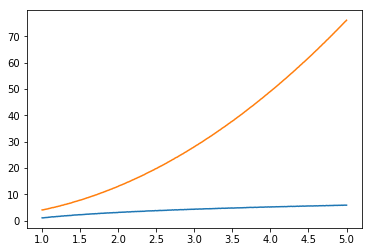

In [107]:
fig, ax = plt.subplots()
for Y in [df['y'], df['ysq']]:
    ax.plot(df['X'], Y)

#### Challenge 1

In [108]:
# import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression

# X_train, X_test, y_train, y_test = train_test_split(X, df1['DomesticTotalGross'], test_size=0.3,random_state=42)

In [110]:
y = df['ysq']
X = df[['X', 'X2']]
# X = X.reshape(-1,1)

In [111]:
lr_quad_model = LinearRegression()
lr_quad_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
test_set_pred = lr_quad_model.predict(X)

(array([ 54.,  43.,  63.,  34.,  55.,  49.,  41.,  52.,  53.,  56.]),
 array([-0.05086621, -0.04078036, -0.0306945 , -0.02060865, -0.0105228 ,
        -0.00043694,  0.00964891,  0.01973477,  0.02982062,  0.03990648,
         0.04999233]),
 <a list of 10 Patch objects>)

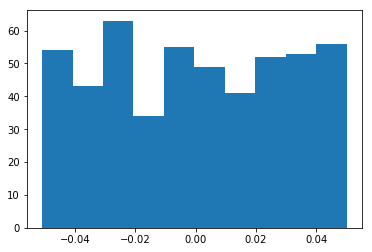

In [113]:
plt.hist(test_set_pred-y)
# plt.plot()  #np.linspace(0,100,1),np.linspace(0,100,1))

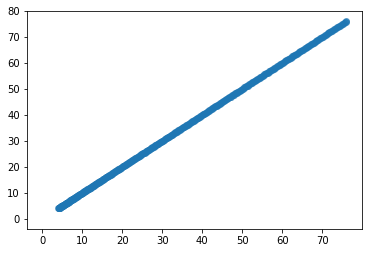

In [114]:
plt.scatter(test_set_pred,y,alpha=.6)
plt.plot(np.linspace(0,100,1),np.linspace(0,100,1))

In [117]:
y = df['y']
X = df[['X','logX']]
# X = X.reshape(-1,1)

In [118]:
lr_log_model = LinearRegression()
lr_log_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
test_set_pred = lr_log_model.predict(X)

(array([ 52.,  43.,  61.,  38.,  53.,  49.,  42.,  53.,  51.,  58.]),
 array([-0.05130428, -0.04118005, -0.03105583, -0.0209316 , -0.01080738,
        -0.00068315,  0.00944107,  0.0195653 ,  0.02968953,  0.03981375,
         0.04993798]),
 <a list of 10 Patch objects>)

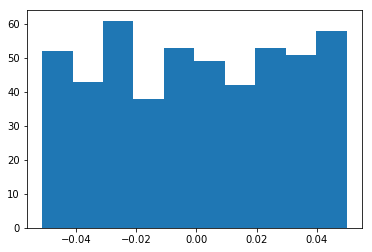

In [120]:
plt.hist(test_set_pred-y)

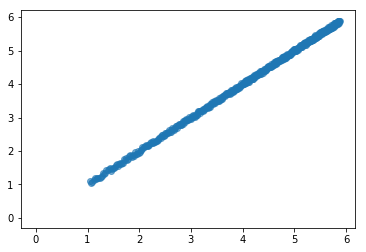

In [122]:
plt.scatter(test_set_pred,y,alpha=.6)
plt.plot(np.linspace(0,100,1),np.linspace(0,100,1))

#### Challenge 2

In [28]:
df2 = df[['X', 'B0', 'B1', 'epsilon']]


In [29]:
df2['B2'] = 5

C:\Users\aj282\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
def transform_ysq2(B0, B1, B2, X, epsilon):
    return B0 + (B1*(X)) + (B2*(X**2)) + epsilon


df2['ysq2'] = df2.apply(lambda x: transform_ysq2(x['B0'], x['B1'], x['B2'], x['X'], x['epsilon']), axis=1)

In [123]:
df2['X2'] = np.square(df2['X'])

In [124]:
df2.head()

,X,B0,B1,epsilon,B2,ysq2,X2
0,1.000000,1,3,0.090747,5,9.090747,1.000000
1,1.008016,1,3,0.018520,5,9.123050,1.016096
2,1.016032,1,3,0.035504,5,9.245206,1.032321
3,1.024048,1,3,0.053856,5,9.369372,1.048675
4,1.032064,1,3,0.098263,5,9.520237,1.065156


In [126]:
y = df2['ysq2']
X = df2[['X', 'X2']]
# X = X.reshape(-1,1)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [128]:
lr_log_model = LinearRegression()
lr_log_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
test_set_pred = lr_log_model.predict(X_test)

(array([ 18.,  17.,  19.,   9.,  11.,  15.,  16.,  17.,   8.,  20.]),
 array([-0.05278568, -0.04275704, -0.0327284 , -0.02269976, -0.01267112,
        -0.00264249,  0.00738615,  0.01741479,  0.02744343,  0.03747207,
         0.0475007 ]),
 <a list of 10 Patch objects>)

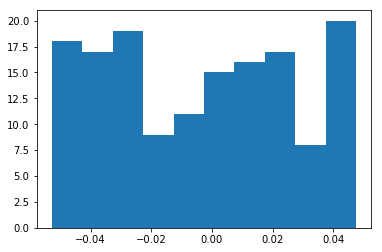

In [130]:
plt.hist(test_set_pred-y_test)

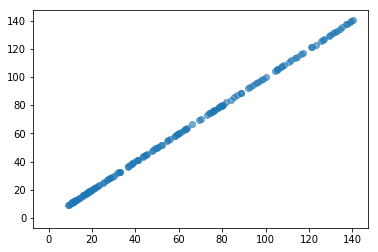

In [131]:
plt.scatter(test_set_pred,y_test,alpha=.6)
plt.plot(np.linspace(0,100,1),np.linspace(0,100,1))

In [132]:
np.mean((test_set_pred - y_test)**2)

0.0009240892488309258

In [133]:
np.sqrt(np.mean((test_set_pred - y_test)**2))

0.030398836307183305

#### Challenge 3

In [134]:
df3 = df2
df3.head()

,X,B0,B1,epsilon,B2,ysq2,X2
0,1.000000,1,3,0.090747,5,9.090747,1.000000
1,1.008016,1,3,0.018520,5,9.123050,1.016096
2,1.016032,1,3,0.035504,5,9.245206,1.032321
3,1.024048,1,3,0.053856,5,9.369372,1.048675
4,1.032064,1,3,0.098263,5,9.520237,1.065156


In [135]:
df3['B3'] = 7
df3['B4'] = 9
df3['B5'] = 11
df3['B6'] = 13
df3['B7'] = 15

In [137]:
def transform_ysq3(B0, B1, B2, B3, X, epsilon):
    return B0 + (B1*(X)) + (B2*(X**2)) + (B3*(X**3)) + epsilon


df3['ysq3'] = df3.apply(lambda x: transform_ysq3(x['B0'], x['B1'], x['B2'], x['B3'], x['X'], x['epsilon']), axis=1)
df3['X3'] = np.power(df3['X'], 3)

In [138]:
def transform_ysq4(B0, B1, B2, B3, B4, X, epsilon):
    return B0 + (B1*(X)) + (B2*(X**2)) + (B3*(X**3)) + (B4*(X**4)) + epsilon


df3['ysq4'] = df3.apply(lambda x: transform_ysq4(x['B0'], x['B1'], x['B2'], x['B3'], x['B4'], x['X'], x['epsilon']), axis=1)
df3['X4'] = np.power(df3['X'], 4)

In [139]:
def transform_ysq5(B0, B1, B2, B3, B4, B5, X, epsilon):
    return B0 + (B1*(X)) + (B2*(X**2)) + (B3*(X**3)) + (B4*(X**4)) + (B5*(X**5)) +epsilon


df3['ysq5'] = df3.apply(lambda x: transform_ysq5(x['B0'], x['B1'], x['B2'], x['B3'], x['B4'], x['B5'], x['X'], x['epsilon']), axis=1)
df3['X5'] = np.power(df3['X'], 5)

In [140]:
def transform_ysq6(B0, B1, B2, B3, B4, B5, B6, X, epsilon):
    return B0 + (B1*(X)) + (B2*(X**2)) + (B3*(X**3)) + (B4*(X**4)) + (B5*(X**5)) + (B6*(X**6)) + epsilon


df3['ysq6'] = df3.apply(lambda x: transform_ysq6(x['B0'], x['B1'], x['B2'], x['B3'], x['B4'], x['B5'], x['B6'], x['X'], x['epsilon']), axis=1)
df3['X6'] = np.power(df3['X'], 6)

In [141]:
def transform_ysq7(B0, B1, B2, B3, B4, B5, B6, B7, X, epsilon):
    return B0 + (B1*(X)) + (B2*(X**2)) + (B3*(X**3)) + (B4*(X**4)) + (B5*(X**5)) + (B6*(X**6)) + (B7*(X**7)) + epsilon


df3['ysq7'] = df3.apply(lambda x: transform_ysq7(x['B0'], x['B1'], x['B2'], x['B3'], x['B4'], x['B5'], x['B6'], x['B7'], x['X'], x['epsilon']), axis=1)
df3['X7'] = np.power(df3['X'], 7)

In [154]:
def transform_y(B0, B1, X, epsilon):
    return B0 + (B1*(X)) + epsilon

df3['y'] = df3.apply(lambda x: transform_y(x['B0'], x['B1'], x['X'], x['epsilon']), axis=1)

In [155]:
df3.head()

,X,B0,B1,epsilon,B2,ysq2,X2,B3,B4,B5,...,X3,ysq4,X4,ysq5,X5,ysq6,X6,ysq7,X7,y
0,1.000000,1,3,0.090747,5,9.090747,1.000000,7,9,11,...,1.000000,25.090747,1.000000,36.090747,1.000000,49.090747,1.000000,64.090747,1.000000,4.090747
1,1.008016,1,3,0.018520,5,9.123050,1.016096,7,9,11,...,1.024241,25.584805,1.032452,37.032812,1.040728,50.670727,1.049070,66.532924,1.057480,4.042568
2,1.016032,1,3,0.035504,5,9.245206,1.032321,7,9,11,...,1.048871,26.178489,1.065687,38.088982,1.082772,52.390688,1.100131,69.157216,1.117769,4.083601
3,1.024048,1,3,0.053856,5,9.369372,1.048675,7,9,11,...,1.073893,26.784088,1.099718,39.171896,1.126164,54.164100,1.153246,71.878797,1.180980,4.126000
4,1.032064,1,3,0.098263,5,9.520237,1.065156,7,9,11,...,1.099310,27.426427,1.134558,40.306731,1.170937,56.016994,1.208482,74.725454,1.247231,4.194455


In [156]:
# y = df3['ysq7']
# X = df3['X']
# X = X.reshape(-1,1)

In [271]:
X2 = np.linspace(0,8, 8)

results = pd.DataFrame()  #columns=['Iteration', 'TrainingError', 'TestingError']

results['Order'] = X2
results['TrainingError'] = X2
results['TestError'] = X2
results['R-square'] = X2
results['AIC'] = X2

In [272]:
X = df3['B0']
y = df3['ysq2']
X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

lr_0order_model = LinearRegression()
lr_0order_model.fit(X_train,y_train)


test_set_pred = lr_0order_model.predict(X_test)

train_set_pred = lr_0order_model.predict(X_train)


trainerror = np.sqrt(np.mean((train_set_pred - y_train)**2))
testerror = np.sqrt(np.mean((test_set_pred - y_test)**2))
r2 = r2_score(y_test, test_set_pred)
# AIC_train = 2+(len(X_train)*np.log(trainerror/len(X_train)))

# AIC = 2 + (len(X_test)*np.log(testerror/len(X_test)))

results['Order'][0]= '0'
results['TrainingError'][0]= trainerror
results['TestError'][0]= testerror
results['R-square'][0]= r2
# results['AIC'][0]= AIC

C:\Users\aj282\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [273]:
OLSresults = sm.OLS(y_train, X_train).fit()
print(OLSresults.summary())

                            OLS Regression Results                            
Dep. Variable:                   ysq2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Mon, 09 Oct 2017   Prob (F-statistic):                nan
Time:                        17:35:59   Log-Likelihood:                -1769.5
No. Observations:                 350   AIC:                             3541.
Df Residuals:                     349   BIC:                             3545.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.1278      2.033     30.566      0.0

C:\Users\aj282\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In [274]:
results['AIC'][0]= -1769.

In [275]:
X = df3['X']
y = df3['ysq2']
X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

lr_1order_model = LinearRegression()
lr_1order_model.fit(X_train,y_train)


test_set_pred = lr_1order_model.predict(X_test)

train_set_pred = lr_1order_model.predict(X_train)


trainerror = np.sqrt(np.mean((train_set_pred - y_train)**2))
testerror = np.sqrt(np.mean((test_set_pred - y_test)**2))
r2 = r2_score(y_test, test_set_pred)
# AIC_train = 2+(len(X_train)*np.log(trainerror/len(X_train)))
AIC = 2+(len(X_test)*np.log(testerror/len(X_test)))

results['Order'][1]= '1'
results['TrainingError'][1]= trainerror
results['TestError'][1]= testerror
results['R-square'][1]= r2
results['AIC'][1]= AIC

C:\Users\aj282\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [276]:
OLSresults = sm.OLS(y_train, X_train).fit()
print(OLSresults.summary())

                            OLS Regression Results                            
Dep. Variable:                   ysq2   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     8372.
Date:                Mon, 09 Oct 2017   Prob (F-statistic):          5.36e-246
Time:                        17:36:00   Log-Likelihood:                -1434.2
No. Observations:                 350   AIC:                             2870.
Df Residuals:                     349   BIC:                             2874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            22.1181      0.242     91.501      0.0

In [277]:
results['AIC'][1]= -1434.

In [278]:
X = df3[['X','X2']]
y = df3['ysq2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

lr_2order_model = LinearRegression()
lr_2order_model.fit(X_train,y_train)


test_set_pred = lr_2order_model.predict(X_test)

train_set_pred = lr_2order_model.predict(X_train)


trainerror = np.sqrt(np.mean((train_set_pred - y_train)**2))
testerror = np.sqrt(np.mean((test_set_pred - y_test)**2))
r2 = r2_score(y_test, test_set_pred)
# AIC_train = 2+(len(X_train)*np.log(trainerror/len(X_train)))
AIC = 2+(len(X_test)*np.log(testerror/len(X_test)))

results['Order'][2]= '2'
results['TrainingError'][2]= trainerror
results['TestError'][2]= testerror
results['R-square'][2]= r2
results['AIC'][2]= AIC


In [279]:
OLSresults = sm.OLS(y_train, X_train).fit()
print(OLSresults.summary())

                            OLS Regression Results                            
Dep. Variable:                   ysq2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.267e+07
Date:                Mon, 09 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:36:01   Log-Likelihood:                 174.36
No. Observations:                 350   AIC:                            -344.7
Df Residuals:                     348   BIC:                            -337.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              3.7327      0.010    364.347      0.0

In [280]:
results['AIC'][2]= -344.7

In [281]:
X = df3[['X','X2','X3']]
y = df3['ysq2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

lr_3order_model = LinearRegression()
lr_3order_model.fit(X_train,y_train)


test_set_pred = lr_3order_model.predict(X_test)

train_set_pred = lr_3order_model.predict(X_train)


trainerror = np.sqrt(np.mean((train_set_pred - y_train)**2))
testerror = np.sqrt(np.mean((test_set_pred - y_test)**2))
r2 = r2_score(y_test, test_set_pred)
# AIC_train = 2+(len(X_train)*np.log(trainerror/len(X_train)))
AIC = 2+(len(X_test)*np.log(testerror/len(X_test)))

results['Order'][3]= '3'
results['TrainingError'][3]= trainerror
results['TestError'][3]= testerror
results['R-square'][3]= r2
results['AIC'][3]= AIC

In [282]:
OLSresults = sm.OLS(y_train, X_train).fit()
print(OLSresults.summary())

                            OLS Regression Results                            
Dep. Variable:                   ysq2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.457e+08
Date:                Mon, 09 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:36:02   Log-Likelihood:                 460.68
No. Observations:                 350   AIC:                            -915.4
Df Residuals:                     347   BIC:                            -903.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              4.2061      0.013    316.403      0.0

In [283]:
results['AIC'][3]= -915.4

In [284]:
X = df3[['X','X2','X3','X4']]
y = df3['ysq2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

lr_4order_model = LinearRegression()
lr_4order_model.fit(X_train,y_train)


test_set_pred = lr_4order_model.predict(X_test)

train_set_pred = lr_4order_model.predict(X_train)


trainerror = np.sqrt(np.mean((train_set_pred - y_train)**2))
testerror = np.sqrt(np.mean((test_set_pred - y_test)**2))
r2 = r2_score(y_test, test_set_pred)
# AIC_train = 2+(len(X_train)*np.log(trainerror/len(X_train)))
AIC = 2+(len(X_test)*np.log(testerror/len(X_test)))

results['Order'][4]= '4'
results['TrainingError'][4]= trainerror
results['TestError'][4]= testerror
results['R-square'][4]= r2
results['AIC'][4]= AIC

In [285]:
OLSresults = sm.OLS(y_train, X_train).fit()
print(OLSresults.summary())

                            OLS Regression Results                            
Dep. Variable:                   ysq2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.434e+08
Date:                Mon, 09 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:36:05   Log-Likelihood:                 661.60
No. Observations:                 350   AIC:                            -1315.
Df Residuals:                     346   BIC:                            -1300.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              4.6932      0.019    242.423      0.0

In [286]:
results['AIC'][4]= -1315.

In [287]:
X = df3[['X','X2','X3','X4','X5']]
y = df3['ysq2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

lr_5order_model = LinearRegression()
lr_5order_model.fit(X_train,y_train)


test_set_pred = lr_5order_model.predict(X_test)

train_set_pred = lr_5order_model.predict(X_train)


trainerror = np.sqrt(np.mean((train_set_pred - y_train)**2))
testerror = np.sqrt(np.mean((test_set_pred - y_test)**2))
r2 = r2_score(y_test, test_set_pred)
# AIC_train = 2+(len(X_train)*np.log(trainerror/len(X_train)))
AIC = 2+(len(X_test)*np.log(testerror/len(X_test)))

results['Order'][5]= '5'
results['TrainingError'][5]= trainerror
results['TestError'][5]= testerror
results['R-square'][5]= r2
results['AIC'][5]= AIC

In [288]:
OLSresults = sm.OLS(y_train, X_train).fit()
print(OLSresults.summary())

                            OLS Regression Results                            
Dep. Variable:                   ysq2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.947e+08
Date:                Mon, 09 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:36:07   Log-Likelihood:                 725.53
No. Observations:                 350   AIC:                            -1441.
Df Residuals:                     345   BIC:                            -1422.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              5.1538      0.041    126.662      0.0

In [289]:
results['AIC'][5]= -1441.

In [290]:
X = df3[['X','X2','X3','X4', 'X5', 'X6']]
y = df3['ysq2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

lr_6order_model = LinearRegression()
lr_6order_model.fit(X_train,y_train)


test_set_pred = lr_6order_model.predict(X_test)

train_set_pred = lr_6order_model.predict(X_train)


trainerror = np.sqrt(np.mean((train_set_pred - y_train)**2))
testerror = np.sqrt(np.mean((test_set_pred - y_test)**2))
r2 = r2_score(y_test, test_set_pred)
# AIC_train = 2+(len(X_train)*np.log(trainerror/len(X_train)))
AIC = 2+(len(X_test)*np.log(testerror/len(X_test)))

results['Order'][6]= '6'
results['TrainingError'][6]= trainerror
results['TestError'][6]= testerror
results['R-square'][6]= r2
results['AIC'][6]= AIC

In [291]:
OLSresults = sm.OLS(y_train, X_train).fit()
print(OLSresults.summary())

                            OLS Regression Results                            
Dep. Variable:                   ysq2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.447e+08
Date:                Mon, 09 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:36:10   Log-Likelihood:                 734.22
No. Observations:                 350   AIC:                            -1456.
Df Residuals:                     344   BIC:                            -1433.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              5.5500      0.103     54.057      0.0

In [292]:
results['AIC'][6]= -1456.

In [293]:
X = df3[['X','X2','X3','X4', 'X5', 'X6','X7']]
y = df3['ysq2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

lr_7order_model = LinearRegression()
lr_7order_model.fit(X_train,y_train)


test_set_pred = lr_7order_model.predict(X_test)

train_set_pred = lr_7order_model.predict(X_train)


trainerror = np.sqrt(np.mean((train_set_pred - y_train)**2))
testerror = np.sqrt(np.mean((test_set_pred - y_test)**2))
r2 = r2_score(y_test, test_set_pred)
# AIC_train = 2+(len(X_train)*np.log(trainerror/len(X_train)))
AIC = 2+(len(X_test)*np.log(testerror/len(X_test)))

results['Order'][7]= '7'
results['TrainingError'][7]= trainerror
results['TestError'][7]= testerror
results['R-square'][7]= r2
results['AIC'][7]= AIC

In [294]:
OLSresults = sm.OLS(y_train, X_train).fit()
print(OLSresults.summary())

                            OLS Regression Results                            
Dep. Variable:                   ysq2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.966e+08
Date:                Mon, 09 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:36:12   Log-Likelihood:                 735.42
No. Observations:                 350   AIC:                            -1457.
Df Residuals:                     343   BIC:                            -1430.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              5.9240      0.264     22.401      0.0

In [295]:
results['AIC'][7]= -1457.

In [296]:
results

,Order,TrainingError,TestError,R-square,AIC
0,0.0,37.971803,40.187209,-0.001021,-1769.0
1,1.0,5.850064,6.323904,0.975212,-1434.0
2,2.0,0.029639,0.030399,0.999999,-344.7
3,3.0,0.029639,0.030397,0.999999,-915.4
4,4.0,0.029616,0.030570,0.999999,-1315.0
5,5.0,0.029594,0.030606,0.999999,-1441.0
6,6.0,0.029592,0.030668,0.999999,-1456.0
7,7.0,0.029589,0.030660,0.999999,-1457.0


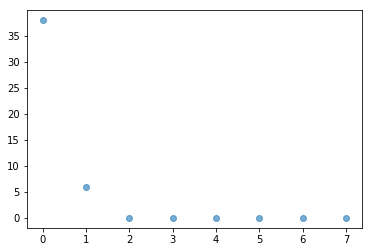

In [297]:
plt.scatter(results['Order'],results['TrainingError'],alpha=.6)
plt.plot(np.linspace(0,100,1),np.linspace(0,100,1))

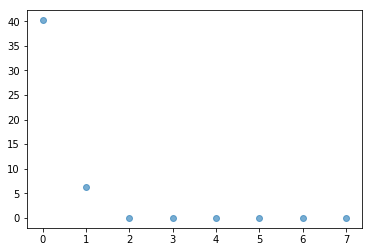

In [299]:
plt.scatter(results['Order'],results['TestError'],alpha=.6)
plt.plot(np.linspace(0,100,1),np.linspace(0,100,1))

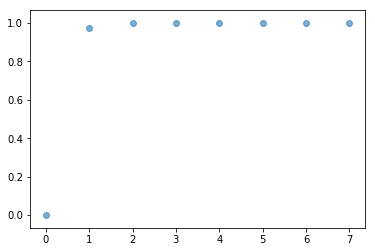

In [300]:
plt.scatter(results['Order'],results['R-square'],alpha=.6)
plt.plot(np.linspace(0,100,1),np.linspace(0,100,1))

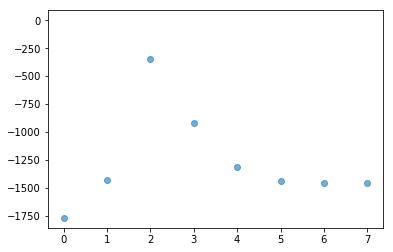

In [301]:
plt.scatter(results['Order'],results['AIC'],alpha=.6)
plt.plot(np.linspace(0,100,1),np.linspace(0,100,1))

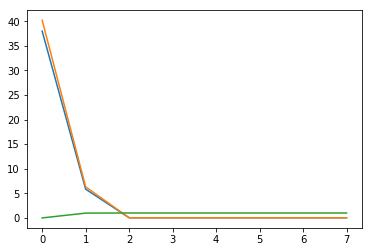

In [302]:
fig, ax = plt.subplots()
for Y in [results['TrainingError'], results['TestError'], results['R-square']]:
    ax.plot(results['Order'], Y)

In [222]:
# lr_7order_model = LinearRegression()
# lr_7order_model.fit(X_train,y_train)


# test_set_pred = lr_7order_model.predict(X_test)

In [223]:
# #train error
# train_set_pred = lr_7order_model.predict(X_train)


# trainerror = np.sqrt(np.mean((train_set_pred - y_train)**2))
# trainerror

In [224]:
# #test error

# testerror = np.sqrt(np.mean((test_set_pred - y_test)**2))
# testerror

In [225]:
# from sklearn.metrics import r2_score
# r2_score(y_test, test_set_pred)

In [226]:
# #AIC Test
# AIC_train = 2+(len(X_train)*np.log(trainerror/len(X_train)))
# AIC_train

In [227]:
#AIC Test
AIC_test = 2+(len(X_test)*np.log(testerror/len(X_test)))
AIC_test

-1272.3127752521484

In [228]:
# plt.hist(test_set_pred-y_test)

In [230]:
# plt.scatter(test_set_pred,y_test,alpha=.6)
# plt.plot(np.linspace(0,100,1),np.linspace(0,100,1))

#### Challenge 4

In [72]:
X = np.linspace(1,5, 500)
df = pd.DataFrame(X)

df.rename(index=str, columns={0: 'X'}, inplace=True)

epsilon = []
for i in range(500):
    epsilon.append((np.random.random()/10))
    
df['B0'] = 1
df['epsilon'] = epsilon

df['B1'] = 3

def transform_y(B0, B1, X, epsilon):
    return B0 + (B1*np.log(X)) + epsilon


df['y'] = df.apply(lambda x: transform_y(x['B0'], x['B1'], x['X'], x['epsilon']), axis=1)

In [73]:
df2 = df[['X', 'B0', 'B1', 'epsilon']]
df2['B2'] = 5

def transform_ysq2(B0, B1, B2, X, epsilon):
    return B0 + (B1*(X)) + (B2*(X**2)) + epsilon


df2['ysq2'] = df2.apply(lambda x: transform_ysq2(x['B0'], x['B1'], x['B2'], x['X'], x['epsilon']), axis=1)



In [90]:
df2['X2'] = np.square(df2['X'])

In [91]:
df2.head()

,X,B0,B1,epsilon,B2,ysq2,X2
0,1.000000,1,3,0.090747,5,9.090747,1.000000
1,1.008016,1,3,0.018520,5,9.123050,1.016096
2,1.016032,1,3,0.035504,5,9.245206,1.032321
3,1.024048,1,3,0.053856,5,9.369372,1.048675
4,1.032064,1,3,0.098263,5,9.520237,1.065156


In [93]:
y = df2['ysq2']
X = df2[['X','X2']]
# X = X.reshape(-1,1)

In [95]:
import pandas as pd

X2 = np.linspace(1,2, 100)

results = pd.DataFrame()  #columns=['Iteration', 'TrainingError', 'TestingError']

results['Iteration'] = X2
results['TrainingError'] = X2
results['TestError'] = X2


# from collections import defaultdict

In [96]:
results.head()

,Iteration,TrainingError,TestError
0,1.000000,1.000000,1.000000
1,1.010101,1.010101,1.010101
2,1.020202,1.020202,1.020202
3,1.030303,1.030303,1.030303
4,1.040404,1.040404,1.040404


In [97]:
n = 0

for i in range(5,len(df2),5):
    
    X_train, X_test, y_train, y_test = train_test_split(X[:i], y[:i], test_size=0.3,random_state=42)

    lr_model = LinearRegression()
    lr_log_model.fit(X_train,y_train)

    train_set_pred = lr_log_model.predict(X_train)
    test_set_pred = lr_log_model.predict(X_test)
    
    trainerror = np.sqrt(np.mean((train_set_pred - y_train)**2))
    testerror = np.sqrt(np.mean((test_set_pred - y_test)**2))
    
    results['Iteration'][n] = i
    results['TrainingError'][n] = trainerror
    results['TestError'][n] = testerror
    
    n+=1

In [98]:
results.head()

,Iteration,TrainingError,TestError
0,5.0,1.893855e-14,0.020958
1,10.0,2.103462e-02,0.033915
2,15.0,2.929685e-02,0.027624
3,20.0,3.291100e-02,0.039125
4,25.0,2.952920e-02,0.038733


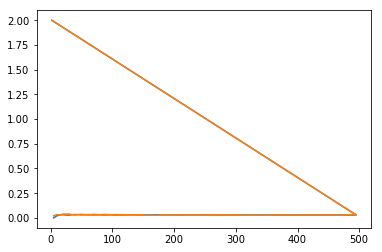

In [99]:
fig, ax = plt.subplots()
for Y in [results['TrainingError'], results['TestError']]:
    ax.plot(results['Iteration'], Y)